In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Import csv file

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# No null data

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

# Split data 70/30

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Bulid Logistic Regression Model

In [9]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred_log = logreg.predict(x_test)

In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[120  31]
 [ 30  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



### It's noted that accuracy score = 74% and f1 score for class 0 = 80% and f1 score for class 1 = 62%

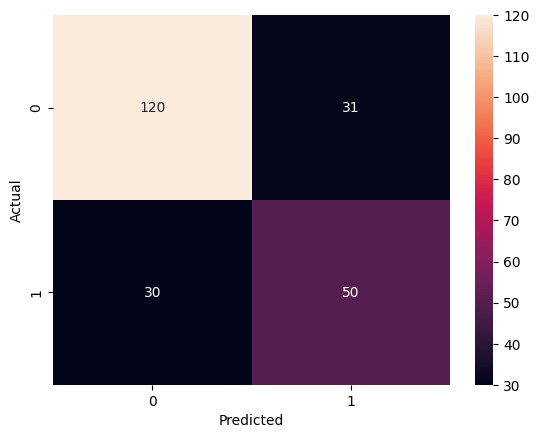

In [12]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Build DecisionTree model

In [13]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred_tree = tree.predict(x_test)

In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[107  44]
 [ 25  55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



### It's noted that accuracy score = 70% and f1 score for class 0 = 76% and f1 score for class 1 = 61%

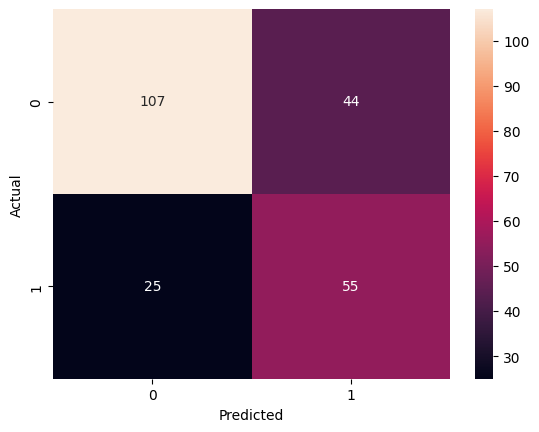

In [16]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Build Random Forest Model

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred_rf = rf_model.predict(x_test)

In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[121  30]
 [ 27  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



### It's noted that accuracy score = 75% and f1 score for class 0 = 81% and f1 score for class 1 = 65%

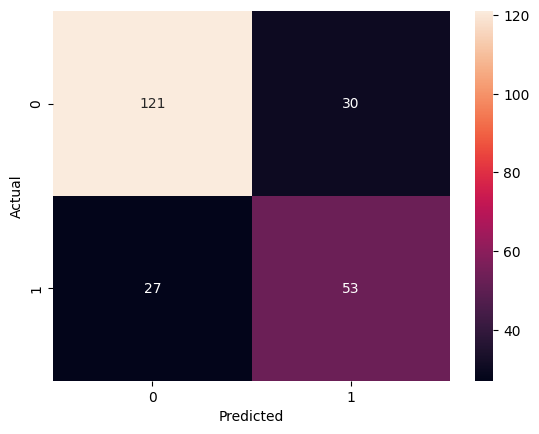

In [20]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# <span style="color:red">Conclusion :</span>

### <span style="color:blue"> Between the 3 model the best one is Random Forest</span>

# ✅ Experiment 1 - Feature Scaling:

In [21]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### For logistic Regression

In [22]:
log_reg_scaled = LogisticRegression(max_iter=1000, random_state=42)
log_reg_scaled.fit(x_train_scaled, y_train)
y_pred_scaled_log = log_reg_scaled.predict(x_test_scaled)

In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled_log))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



### Everything is the same for logestic regression after scaling 

## For DecisionTree

In [24]:
dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(x_train_scaled, y_train)
y_pred_scaled_tree = dt_scaled.predict(x_test_scaled)


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled_tree))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       151
           1       0.56      0.70      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



### Accuracy increased 1 percent and f1 score for class zero increased 1 percent but for class 0 it's the same

# For Random Forest

In [26]:
rf_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scaled.fit(x_train_scaled, y_train)
y_pred_scaled_rf = rf_scaled.predict(x_test_scaled)

In [27]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



### Accuracy increased 1 percent but f1 score is the same for each class

## <span style="color:red">From observation Feature Scaling didn't affect that much</span>


# ✅ Experiment 2 - Change Train-Test Split Ratio:

In [28]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.2, random_state=42)

# For Logistic Regression

In [29]:
log_reg_new = LogisticRegression(max_iter=1000, random_state=42)
log_reg_new.fit(x_train_new, y_train_new)
y_pred_new_log = log_reg_new.predict(x_test_new)

In [30]:
print("\nClassification Report:")
print(classification_report(y_test_new, y_pred_new_log))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Accuracy increased 1 percent and f1 score for 1 class increased 3 percent but for class 0 it's the same

# For Decision Tree

In [31]:
dt_new = DecisionTreeClassifier(random_state=42)
dt_new.fit(x_train_new, y_train_new)
y_pred_new_tree = dt_new.predict(x_test_new)

In [32]:
print("\nClassification Report:")
print(classification_report(y_test_new, y_pred_new_tree))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



##### Accuracy score increased 5 percent and f1 score for class 0 increased 3 percent and f1 score for class 1 increased 6 percent 

# For Random Forest

In [33]:
rf_new = RandomForestClassifier(n_estimators=100, random_state=42)
rf_new.fit(x_train_new, y_train_new)
y_pred_new_rf = rf_new.predict(x_test_new)

In [34]:
print("\nClassification Report:")
print(classification_report(y_test_new, y_pred_new_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



### Accuracy and f1 score for both classes decrease

# <span style="color:red">Conclusion :</span>

##### <span style="color:blue"> changing train/test ratio didn't affect logestic regression but increased the accuracy of decision tree but it decreased accuracy of random forest</span>

# ✅ Experiment 3 - Apply Regularization:

# L1 for Logistic Regression

In [35]:
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
log_reg_l1.fit(x_train , y_train)
y_pred_l1 = log_reg_l1.predict(x_test)

print("Logistic Regression with L1 Regularization (Lasso)")
print(classification_report(y_test, y_pred_l1))

Logistic Regression with L1 Regularization (Lasso)
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



# L2 for Logistic Regression

In [36]:
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
log_reg_l2.fit(x_train, y_train)
y_pred_l2 = log_reg_l2.predict(x_test)

print("Logistic Regression with L2 Regularization (Ridge)")
print(classification_report(y_test, y_pred_l2))


Logistic Regression with L2 Regularization (Ridge)
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



# <span style="color:red">Conclusion :</span>

##### <span style="color:blue"> adding regularization didn't affect accuracy or f1 score that much</span>

##### We can't apply regularization for decision tree nor random forest as they don't use weights or coefficients so there's nothing to apply L1 or L2 regularization to

# <span style="color:red"> Final Conclusion :</span>

##### <span style="color:green"> Expermint one only affected the decision tree but other expermints didn't</span>